In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
metadata = r"\\192.168.205.123\aac_server\INDUSTRIA\URRUNAGA\CAMPAÑA_2\3-Medidas\PREPROCESSING\METADATA\metadata_3-Medidas.json"
# metadata = r"//192.168.205.123/aac_server/TEST_AUDIOMOTH\PREPROCESSING\METADATA\metadata_TEST_AUDIOMOTH.json"

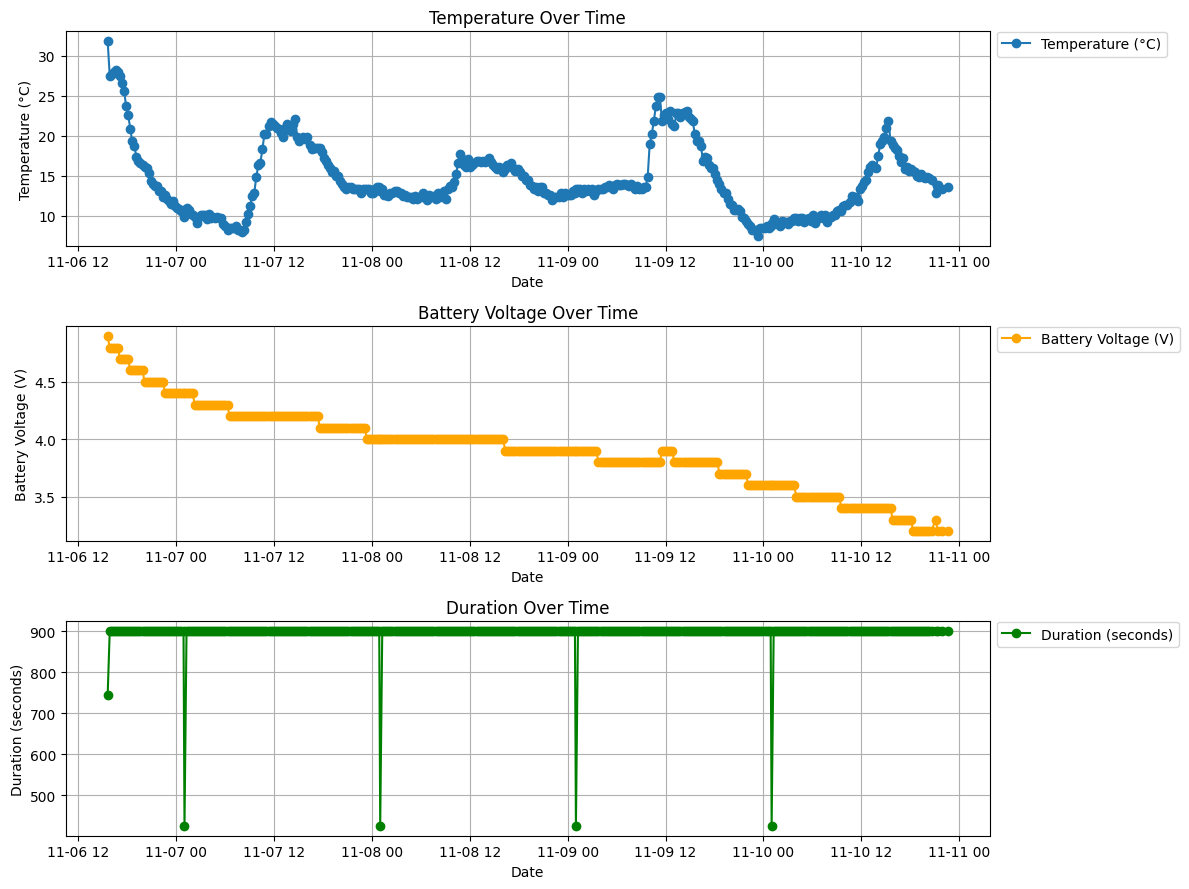

In [14]:
with open(metadata, 'r') as file:
        data = json.load(file)

# the data is stored in a dictionary, so we need to transpose it
df = pd.DataFrame(data).T

# strings to datetime objects
df['date_UTC1'] = pd.to_datetime(df['date_UTC1'])
df = df.sort_values(by='date_UTC1')

# plotting
plt.figure(figsize=(12, 9))

# temperature
plt.subplot(3, 1, 1)
plt.plot(df['date_UTC1'], df['temperature'], marker='o', label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.grid(True)
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.94))



# battery voltage
plt.subplot(3, 1, 2)
plt.plot(df['date_UTC1'], df['battery_v'], marker='o', color='orange', label='Battery Voltage (V)')
plt.xlabel('Date')
plt.ylabel('Battery Voltage (V)')
plt.title('Battery Voltage Over Time')
plt.grid(True)
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.94))



# duration
plt.subplot(3, 1, 3)
plt.plot(df['date_UTC1'], df['duration'], marker='o', color='green', label='Duration (seconds)')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.title('Duration Over Time')
plt.grid(True)
plt.legend()
# putting the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.94))

plt.tight_layout()
# plt.show()

# save plot
plt.savefig('audiomoth_analysis_URRUNAGA.png')